# KNN report

as we know K-nearest neighbors (KNN) is a simple and popular algorithm for classification tasks. for this training, we need to use numpy, sklearn and pandas libraries

In [32]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

at first we have to load the data 

In [33]:
import pandas as pd


data = pd.read_csv('breast-cancer.csv')  # we # load the dataset in here


X = data.iloc[:, :-1].values  # Separate features and labels
y = data.iloc[:, -1].values

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


now we want to analyse the data based on a factor for example perimeter_worst attribute

array([[<Axes: title={'center': 'perimeter_worst'}>]], dtype=object)

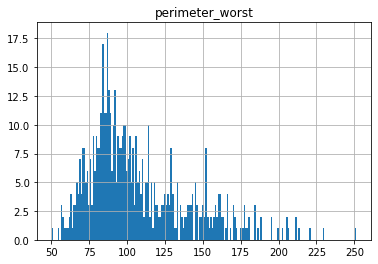

In [34]:
data.hist(column='perimeter_worst', bins=200)

as we can see in the load data part, we have a lot of parameters. let's list them here

In [35]:
X = data.drop('diagnosis', axis=1)   # we should get rid of non-numeric features like 'diagnosis'
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # we split the data into training and testing sets.


scaler = StandardScaler() # in this part we should standardize the features for better performance.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


now we need to Train the KNN classifier

In [36]:
knn_classifier = KNeighborsClassifier(n_neighbors=10) # Creating the KNN classifier with k=10


knn_classifier.fit(X_train, y_train) # in here we train the classifier on the training data

KNeighborsClassifier(n_neighbors=10)

now we need to make predictions and evaluate the model
After training the KNN classifier, let's make predictions on the test set and evaluate the model's performance:

In [37]:
y_pred = knn_classifier.predict(X_test)  # making predictions on the test data


accuracy = accuracy_score(y_test, y_pred)  # in here we calculate accuracy and print classification report
print(f'Accuracy: {accuracy:.2f}')


print('Classification Report:') # in this part we print classification report and confusion matrix
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[69  2]
 [ 3 40]]
